In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_swing = pd.read_csv('./data/2008_swing_states.csv')
#df_swing.head()
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


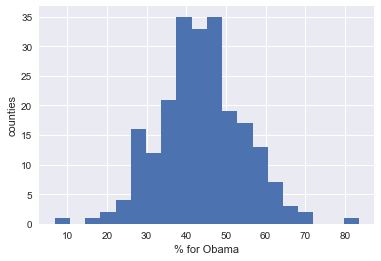

In [3]:
_ = plt.hist(df_swing.dem_share, bins=20)
_ = plt.xlabel('% for Obama')
_ = plt.ylabel('counties')
plt.show()

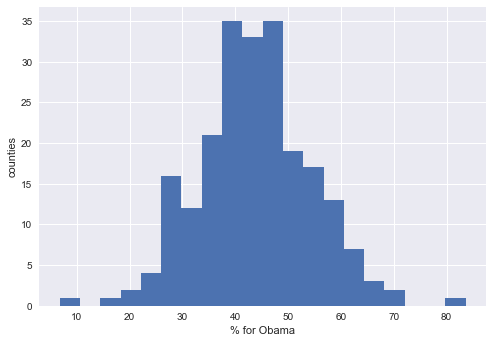

In [4]:
sns.set()
_ = plt.hist(df_swing.dem_share, bins=20)
_ = plt.xlabel('% for Obama')
_ = plt.ylabel('counties')
plt.show()

Empirical cumulative distribution function (ECDF)

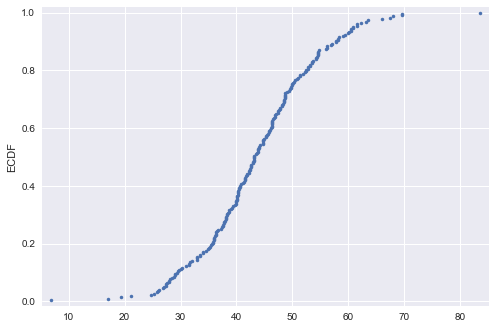

In [5]:
x = np.sort(df_swing.dem_share)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

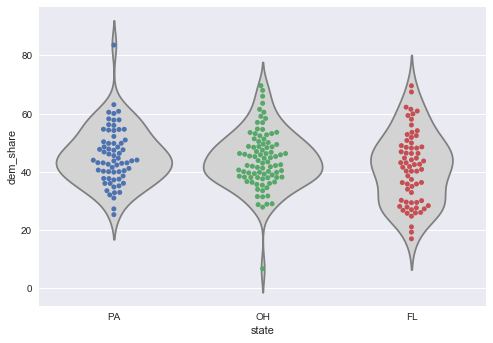

In [6]:
sns.violinplot(x='state', y='dem_share', data=df_swing, inner=None, color='lightgray')
sns.swarmplot(x='state', y='dem_share', data=df_swing)
plt.show()


#### Summary statistics

In [7]:
#mean - сумма всех данных, деланная на количесвто, median - значение среднего

print(df_swing[df_swing.state=='PA'].dem_share.mean())
print(df_swing[df_swing.state=='PA'].dem_share.median())

45.476417910447765
44.03


расчет персентилей

In [8]:
np.percentile(df_swing.dem_share, [25,50,75])

array([ 37.3025,  43.185 ,  49.925 ])

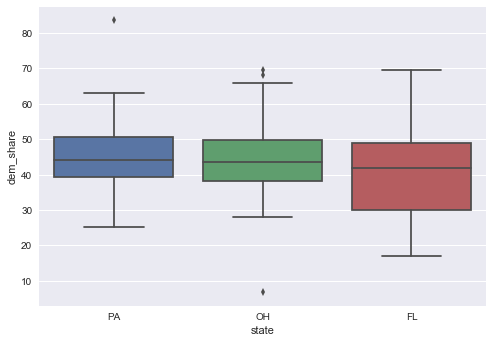

In [9]:
sns.boxplot(x='state', y='dem_share', data=df_swing)
plt.show()

- коробка - внутренние 50% данных, interquartile range, IQR
- расстояние от коробки до ограничителя - 1,5 IQR

In [10]:
percentiles = np.array([2.5, 25,50,75, 97.5])
ptiles_dem = np.percentile(df_swing.dem_share, percentiles)

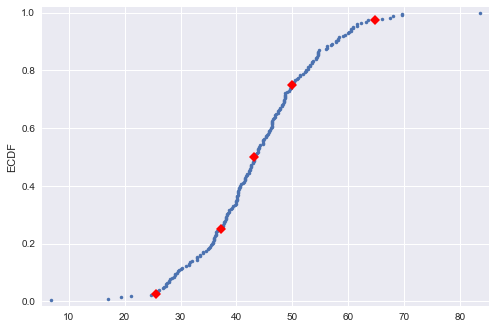

In [11]:
x = np.sort(df_swing.dem_share)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.ylabel('ECDF')
plt.margins(0.02)
# Overlay percentiles as red x's
_ = plt.plot(ptiles_dem, percentiles/100, marker='D', color='red',
         linestyle='none')
plt.show()

- вариативность - средняя квадратичная дистанция от среднего

In [32]:
# среднее квадратичное отклонение

print(np.var(df_swing.dem_share))

# среднее отклонение

print(np.sqrt(np.var(df_swing.dem_share)))
print(np.std(df_swing.dem_share))

114.24649492735986
10.6886152016
10.68861520157592


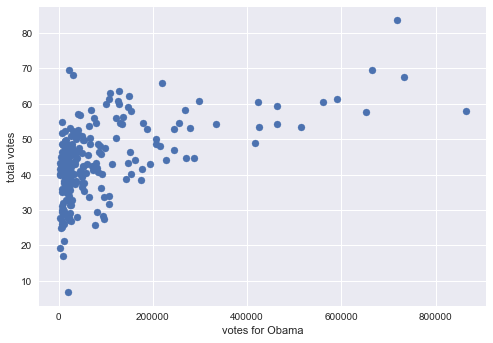

In [13]:
plt.scatter(df_swing.total_votes, df_swing.dem_share)
plt.xlabel('votes for Obama')
plt.ylabel('total votes')
plt.show()

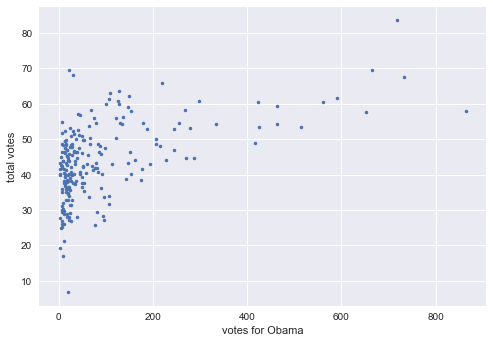

In [14]:
plt.plot(df_swing.total_votes/1000, df_swing.dem_share, marker='.', linestyle='none')
plt.xlabel('votes for Obama')
plt.ylabel('total votes')
plt.show()

covariance - как два показателя взаимодействуют вместе
- среднее произведений отклонений
- знак + позитивная корреляция, - негативная

корреляция Пирсона: covariance / ( x.std * y.std)
- зависимая вариативность / независимая вариативность
- от -1 (негативная корреляция) до 0 (нет корреляции) до +1 (позитивная корреляция)

ковариационая матрица
значения в правом верхнем углу (и левом нижнем) - ковариативность

In [18]:
print(np.cov(df_swing.total_votes/100000, df_swing.dem_share))

[[   2.02451039    8.17309362]
 [   8.17309362  114.76344739]]


корреляция Пирсона - в правом верхнем углу матрицы

In [19]:
corr_mat = np.corrcoef(df_swing.total_votes/100000, df_swing.dem_share)
print(corr_mat)

[[ 1.          0.53619736]
 [ 0.53619736  1.        ]]
